In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('C:/Users/gerrard/Desktop/새 폴더/2020-1/ESC/3주차/wine.csv',names=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info() # No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# PCA 적용 전/후 비교
## PCA 적용 전

traits=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
          'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
y = df['class'].values
X = df[traits].values

In [9]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [10]:
# Logistic을 이용한 Regression

model = LogisticRegression(solver='sag', max_iter=100000)

In [11]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred)) # 약 97% 정확하게 예측함.

0.9722222222222222


In [13]:
# PCA 적용 후

X = df.loc[:, traits].values
y = df.loc[:, ['class']].values

scale = StandardScaler().fit_transform(X)
pd.DataFrame(data = scale, columns = traits).head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [15]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scale)

df_pca = pd.DataFrame(data = X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca = pd.concat([df[['class']], df_pca], axis=1)
df_pca.head()

,class,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688


In [17]:
y_pca = df_pca['class'].values
y_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [22]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = 0.2)

In [23]:
model_pca = LogisticRegression(solver='sag', max_iter=100000)

model_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred_pca = model_pca.predict(X_test_pca)
print(accuracy_score(y_test_pca, pred_pca)) # 더 높아지긴 했는데 애초에 예측을 잘 한듯?

1.0


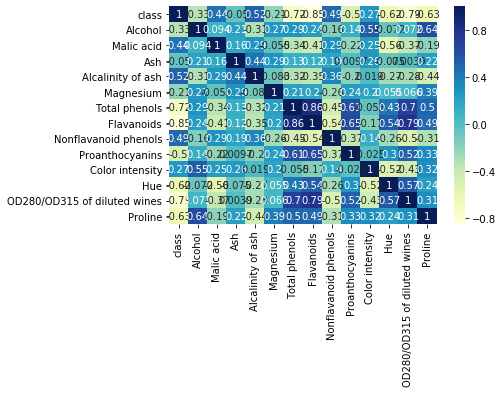

In [30]:
# Factor analysis
## 변수들의 상관관계를 보자

corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [33]:
corr[corr>0.4] # Factor를 한 4개 정도하면 될 것 같다고 생각함.

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.000000,NaN,0.437776,NaN,0.517859,NaN,NaN,NaN,0.489109,NaN,NaN,NaN,NaN,NaN
Alcohol,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.546364,NaN,NaN,0.643720
Malic acid,0.437776,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,NaN,NaN,NaN,1.000000,0.443367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcalinity of ash,0.517859,NaN,NaN,0.443367,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total phenols,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.864564,NaN,0.612413,NaN,0.433681,0.699949,0.498115
Flavanoids,NaN,NaN,NaN,NaN,NaN,NaN,0.864564,1.000000,NaN,0.652692,NaN,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Proanthocyanins,NaN,NaN,NaN,NaN,NaN,NaN,0.612413,0.652692,NaN,1.000000,NaN,NaN,0.519067,NaN


In [34]:
X = df.loc[:, traits].values
fa = FactorAnalysis(n_components = 4)
X_fa = fa.fit_transform(X)

In [35]:
df_fa = pd.DataFrame(data = X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_fa = pd.concat([df[['class']], df_fa], axis=1)
df_fa.head()

,class,Factor1,Factor2,Factor3,Factor4
0,1,1.014330,1.638645,0.742199,0.419389
1,1,0.964980,-0.402547,0.392834,1.297122
2,1,1.394823,-0.493038,0.531681,-0.818399
3,1,2.334634,0.013705,0.472734,-0.273353
4,1,-0.036721,1.414353,0.703801,-1.325195


In [60]:
y_fa = df_fa['class'].values
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(X_fa, y_fa, test_size=0.2)

model_fa = LogisticRegression(solver='sag', max_iter=100000)

In [61]:
model_fa.fit(X_train_fa, y_train_fa)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
pred_fa = model_fa.predict(X_test_fa)
print(accuracy_score(y_test_fa, pred_fa)) # 비슷하게 나왔다. 근데 애초에 워낙 예측을 잘 했다.

0.9722222222222222
